# PROBLEM SET 3

**QUESTION 1**

In [7]:
# IMPORT THE NECESSARY LIBRARIES
import pandas as pd

# IMPORT THE DATASET FROM GIVEN ADDRESS
my_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

#ASSIGN IT TO A VARIABLE CALLED USERS
my_users_data = pd.read_csv(my_url, sep= '|')

# MEAN AGE PER OCCUPATION
my_mean_age_by_occupation = my_users_data.groupby('occupation')['age'].mean()
print(my_mean_age_by_occupation)



occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [22]:
# the Male ratio per occupation and sort it from the most to the least
def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0

my_users_data['gender_numeric'] = my_users_data['gender'].apply(gender_to_numeric)

male_ratio = my_users_data.groupby('occupation')['gender_numeric'].sum() / my_users_data['occupation'].value_counts() * 100
male_ratio.sort_values(ascending=False, inplace=True)
print(male_ratio)

         

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64


In [25]:
#  For each occupation, calculate the minimum and maximum ages
my_age_range_by_occupation = my_users_data.groupby('occupation')['age'].agg(['min', 'max'])
print(my_age_range_by_occupation)


               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [26]:
# For each combination of occupation and sex, calculate the mean age
my_mean_age_by_occupation_gender = my_users_data.groupby(['occupation', 'gender'])['age'].mean()
print(my_mean_age_by_occupation_gender)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [34]:
#  For each occupation present the percentage of women and men
gender_per_by_occupation = my_users_data.groupby(['occupation', 'gender'])['gender'].count() / my_users_data.groupby('occupation')['gender'].count() * 100
print(gender_per_by_occupation)

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

**QUESTION 2**

In [58]:
# EURO TEAMS
#  Import the necessary libraries
import pandas as pd

# Import the dataset from this address
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

# Assign it to a variable called euro12
euro12 = pd.read_csv(url)

#Select only the Goal column
goal = euro12["Goals"]

#How many team participated in the Euro2012?
number_of_teams = euro12["Team"].nunique()
print("Total number of teams participated in the euro12 is:", number_of_teams)




Total number of teams participated in the euro12 is: 16


In [59]:
#  What is the number of columns in the dataset?
number_of_columns = euro12.shape[1]
print("Total number of columns in dataset is:", number_of_columns)


Total number of columns in dataset is: 35


In [60]:
# View only the columns Team, Yellow Cards and Red Cards and assign them 
#to a dataframe called discipline
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]

# Sort the teams by Red Cards, then to Yellow Cards
discipline = discipline.sort_values(["Red Cards", "Yellow Cards"])

# Calculate the mean Yellow Cards given per Team
calculate_mean_yellow_cards = discipline["Yellow Cards"].mean()
print("The mean yellow cards given per team is:", calculate_mean_yellow_cards)




The mean yellow cards given per team is: 7.4375


In [62]:
# Filter teams that scored more than 6 goalsStep 11. Select the teams that start 
#with G

more_than_6_goals = euro12[euro12["Goals"] > 6]
print("Teams that scored more than 6 goals:", more_than_6_goals["Team"].tolist())

teams_start_with_G = euro12[euro12["Team"].str.startswith("G")]
print("Teams start with G are:", teams_start_with_G["Team"].tolist())



Teams that scored more than 6 goals: ['Germany', 'Spain']
Teams start with G are: ['Germany', 'Greece']


In [63]:
# Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("The first seven columns are:\n",first_7_columns)



The first seven columns are:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13  

In [65]:
# Select all columns except the last 3
all_columns_except_the_last_3 = euro12.iloc[:, :-3]
print("All columns except the last three are:\n", all_columns_except_the_last_3)


All columns except the last three are:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                

In [66]:
#Present only the Shooting Accuracy from England, Italy and Russia
shootacc_eng_itly_russ = euro12[euro12["Team"].isin(["England", "Italy", "Russia"])]
cols = shootacc_eng_itly_russ[["Team", "Shooting Accuracy"]]
print("The shooting accuracy from England, Italy and Russia is:\n", cols)


The shooting accuracy from England, Italy and Russia is:
        Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


**QUESTION 3**

In [72]:
# HOUSING
# Import the necessary libraries
import numpy as np
import pandas as pd

# Step 2. Create 3 differents Series, each of length 100, as follows:
#• The first a random number from 1 to 4
#• The second a random number from 1 to 3
#• The third a random number from 10,000 to 30,000

series_1 = pd.Series(np.random.randint(1, 5, size=100))
series_2 = pd.Series(np.random.randint(1, 4, size=100))
series_3 = pd.Series(np.random.randint(10000, 30001,size=100))

# Step 3. Create a DataFrame by joinning the Series by column

dataframe = pd.concat([series_1, series_2, series_3], axis=1)

#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

dataframe.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it 
#to 'bigcolumn'

big_column = pd.concat([series_1, series_2, series_3], axis=0, ignore_index=True)
big_column = pd.DataFrame(big_column)

#Step 6. Ops it seems it is going only until index 99. Is it true?
print(big_column.index.max())



299


In [75]:
# Reindex the DataFrame so it goes from 0 to 299
dataframe = dataframe.reindex(range(300))
print(dataframe)



     bedrs  bathrs  price_sqr_meter
0      1.0     2.0          10044.0
1      1.0     2.0          26864.0
2      1.0     2.0          29380.0
3      1.0     2.0          17702.0
4      1.0     2.0          24647.0
..     ...     ...              ...
295    NaN     NaN              NaN
296    NaN     NaN              NaN
297    NaN     NaN              NaN
298    NaN     NaN              NaN
299    NaN     NaN              NaN

[300 rows x 3 columns]


**QUESTION 4**

In [ ]:
# WIND STATISTICS
# Step 1. Import the necessary libraries




#Step 2. Import the dataset from the attached file wind.txt



#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
#datetime index.



#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
#and apply it.







#Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
#datetime64[ns].





#Step 6. Compute how many values are missing for each location over the entire 
#record.They should be ignored in all calculations below





#Step 7. Compute how many non-missing values there are in total.







#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
#all the times.
#A single number for the entire dataset.







#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
#windspeeds and standard deviations of the windspeeds at each location over all the 
#days
#A different set of numbers for each location.





#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
#windspeed and standard deviations of the windspeeds across all the locations at each 
#day.
#A different set of numbers for each day.







#Step 11. Find the average windspeed in January for each location.
#Treat January 1961 and January 1962 both as January.








#Step 12. Downsample the record to a yearly frequency for each location.






#Step 13. Downsample the record to a monthly frequency for each location.






#Step 14. Downsample the record to a weekly frequency for each location.







#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
#windspeeds across all locations for each week (assume that the first week starts on 
#January 2 1961) for the first 52 weeks








**QUESTION 5**

In [97]:
# Step 1. Import the necessary libraries
import pandas as pd




#Step 2. Import the dataset from this address.
kri_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

#Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(kri_url, delimiter='\t')


#Step 4. See the first 10 entries
print(chipo.head(10))

#Step 5. What is the number of observations in the dataset?
print(len(chipo))


#Step 6. What is the number of columns in the dataset?
print(len(chipo.columns))


#Step 7. Print the name of all the columns.
print(chipo.columns)


#Step 8. How is the dataset indexed?
print(chipo.index)


#Step 9. Which was the most-ordered item?
ordered_item = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1).index[0]
print(ordered_item)


#Step 10. For the most-ordered item, how many items were ordered?
itemsquantity_ordered = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)['quantity'][0]
print(itemsquantity_ordered)



#Step 11. What was the most ordered item in the choice_description column?
itemschoice_ordered = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(1).index[0]
print(itemschoice_ordered)


#Step 12. How many items were orderd in total?
totalitems_orderd = chipo['quantity'].sum()
print(totalitems_orderd)


#Step 13.
#• Turn the item price into a float
#• Check the item price type
#• Create a lambda function and change the type of item price
#• Check the item price type
chipo['item_price'] =  chipo['item_price'].apply(lambda x: float(x[1:-1]))
print(chipo['item_price'].dtype)


#Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)


#Step 15. How many orders were made in the period?
numbers_of_orderd_done = chipo['order_id'].nunique()
print(numbers_of_orderd_done)



#Step 16. What is the average revenue amount per order?
average_revenue = revenue / orders
print(round(average_revenue), 2)



#Step 17. How many different items are sold?
print(chipo['item_name'].nunique())



   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

**QUESTION 6**

In [113]:
import pandas as pd

file_path = "C:\\Users\\krish\\OneDrive\\Desktt 3\\us-marriages-divorces-1867-2014 (1).csv"

df = pd.read_csv(file_path)

df.head()


,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


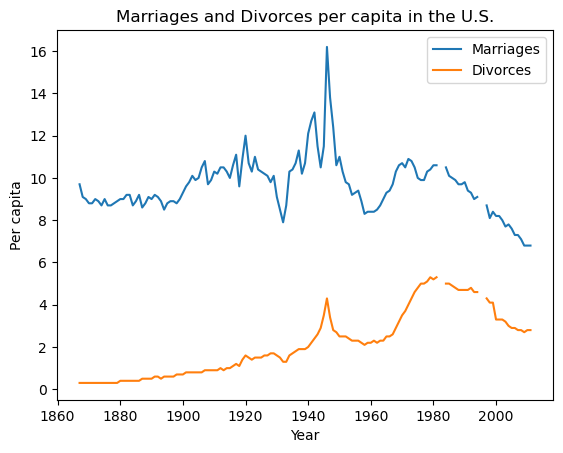

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "C:\\Users\\krish\\OneDrive\\Desktop\\python problem set 3\\us-marriages-divorces-1867-2014 (1).csv"
df = pd.read_csv(file_path)


plt.plot(df.Year, df.Marriages_per_1000, label='Marriages')
plt.plot(df.Year, df.Divorces_per_1000, label='Divorces')

plt.xlabel('Year')
plt.ylabel('Per capita')
plt.title('Marriages and Divorces per capita in the U.S.')
plt.legend()

plt.show()

**QUESTION 7** 

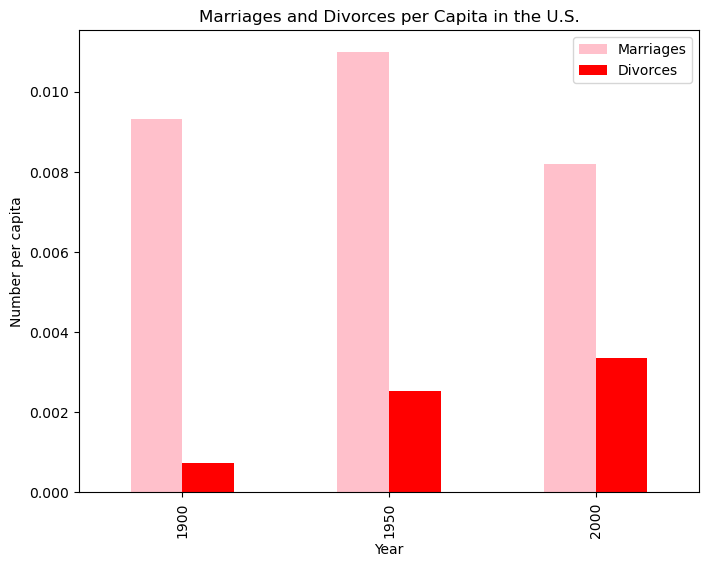

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\krish\\OneDrive\\Desktop\\python problem set 3\\us-marriages-divorces-1867-2014 (1).csv")


years = [1900, 1950, 2000]
df = df[df['Year'].isin(years)]

df['Marriages Per Capita'] = df['Marriages'] / df['Population']
df['Divorces Per Capita'] = df['Divorces'] / df['Population']


ax = df.plot(x='Year', y=['Marriages Per Capita', 'Divorces Per Capita'], kind='bar', figsize=(8,6), color=['pink', 'red'])



ax.set_title('Marriages and Divorces per Capita in the U.S.')
ax.set_xlabel('Year')
ax.set_ylabel('Number per capita')

ax.legend(['Marriages', 'Divorces'])

plt.show()

**QUESTION 8**

In [150]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("C:\\Users\\krish\\OneDrive\\Desktop\\python problem set 3\\actor_kill_counts.csv")

df = df.sort_values("Count", ascending=False)

fig, ax = plt.subplots(figsize(8,6))
ax.barh(df["Actor"], df["Count"], color="red")

ax.set_xlabel("Count")
ax.set_ylabel("Actor")
ax.set_title("Deadliest Actors in Hollywood")


for i, v in enumerate(df["Count"]):
    ax.text(v + 1, i , str(v), color="red", fontweight="italic")
    
    
plt.show()    
        

NameError: name 'figsize' is not defined